In [57]:
# !pipenv install pandas plotly matplotlib statsmodels nbformat ipykernel scikit-learn ipywidgets sweetviz flask pydantic Flask-Pydantic pyarrow optuna

# EDA
import pandas as pd
import statsmodels.api as sm
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import sweetviz as sv

# ML
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score

# Otimizar os hiperparâmetros
import optuna

In [ ]:
df_obesity = pd.read_csv('./datasets/obesity_dataset.csv')

In [3]:
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Genero_Masculino                     2111 non-null   int64  
 1   Idade                                2111 non-null   float64
 2   Historico_Familiar_Sobrepeso         2111 non-null   int64  
 3   Consumo_Alta_Caloria_Com_Frequencia  2111 non-null   int64  
 4   Consumo_Vegetais_Com_Frequencia      2111 non-null   float64
 5   Refeicoes_Dia                        2111 non-null   float64
 6   Consumo_Alimentos_entre_Refeicoes    2111 non-null   int64  
 7   Fumante                              2111 non-null   int64  
 8   Consumo_Agua                         2111 non-null   float64
 9   Monitora_Calorias_Ingeridas          2111 non-null   int64  
 10  Nivel_Atividade_Fisica               2111 non-null   float64
 11  Nivel_Uso_Tela                

In [4]:
# Converter colunas para tipo inteiro
lista_colunas = ['Idade', 'Consumo_Vegetais_Com_Frequencia', 'Refeicoes_Dia',
                 'Consumo_Agua', 'Nivel_Atividade_Fisica','Nivel_Uso_Tela']


df_obesity[lista_colunas] = df_obesity[lista_colunas].astype(int)

In [5]:
# Detectar valores ausentes
df_obesity.isna().sum()

Genero_Masculino                       0
Idade                                  0
Historico_Familiar_Sobrepeso           0
Consumo_Alta_Caloria_Com_Frequencia    0
Consumo_Vegetais_Com_Frequencia        0
Refeicoes_Dia                          0
Consumo_Alimentos_entre_Refeicoes      0
Fumante                                0
Consumo_Agua                           0
Monitora_Calorias_Ingeridas            0
Nivel_Atividade_Fisica                 0
Nivel_Uso_Tela                         0
Consumo_Alcool                         0
Transporte_Automovel                   0
Transporte_Bicicleta                   0
Transporte_Motocicleta                 0
Transporte_Publico                     0
Transporte_Caminhada                   0
Obesidade                              0
dtype: int64

### EDA

In [6]:
# Distribuição da Variável Target - Obesidade

px.bar(df_obesity.value_counts('Obesidade'))

In [7]:
# Distribuição da Variável Target - Obesidade

px.bar(df_obesity.value_counts('Obesidade')/ len(df_obesity)*100)

In [8]:
px.histogram(df_obesity, x='Idade')

In [9]:
px.box(df_obesity, y='Idade')

In [10]:
# Analise Univariada - Genero
px.bar(df_obesity.value_counts('Genero_Masculino') / len(df_obesity) * 100)

In [11]:
# Analise Univariada - Histórico Obesidade na Família
px.bar(df_obesity.value_counts('Historico_Familiar_Sobrepeso') / len(df_obesity)*100)

In [12]:
# Analise Univariada - Nível atividade física
px.bar(df_obesity.value_counts('Nivel_Atividade_Fisica') / len(df_obesity) * 100)

In [13]:
# Analise Univariada - Nível de Uso de tela
px.bar(df_obesity.value_counts('Nivel_Uso_Tela') / len(df_obesity) * 100)

In [14]:
# Formulação de Hipótese
# Faixa Etária influencia em Obesidade
df_obesity['Idade'].describe()

count    2111.000000
mean       23.972525
std         6.308664
min        14.000000
25%        19.000000
50%        22.000000
75%        26.000000
max        61.000000
Name: Idade, dtype: float64

In [15]:
# Bucketing de Idade
bins = [10, 20, 30, 40, 50, 60, 70]
bins_ordinal = [0, 1, 2, 3, 4, 5]
labels_faixa_etaria = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70']
df_obesity['Faixa_Etaria_String'] = pd.cut(x=df_obesity['Idade'],bins=bins,labels=labels_faixa_etaria, include_lowest=True)
df_obesity['Faixa_Etaria'] = pd.cut(x=df_obesity['Idade'],bins=bins,labels=bins_ordinal, include_lowest=True)

In [35]:
df_obesity

,Genero_Masculino,Idade,Historico_Familiar_Sobrepeso,Consumo_Alta_Caloria_Com_Frequencia,Consumo_Vegetais_Com_Frequencia,Refeicoes_Dia,Consumo_Alimentos_entre_Refeicoes,Fumante,Consumo_Agua,Monitora_Calorias_Ingeridas,...,Nivel_Uso_Tela,Consumo_Alcool,Transporte_Automovel,Transporte_Bicicleta,Transporte_Motocicleta,Transporte_Publico,Transporte_Caminhada,Obesidade,Faixa_Etaria_String,Faixa_Etaria
0,0,21,1,0,2,3,1,0,2,0,...,1,0,0,0,0,1,0,0,20-30,1
1,0,21,1,0,3,3,1,1,3,1,...,0,1,0,0,0,1,0,0,20-30,1
2,1,23,1,0,2,3,1,0,2,0,...,1,2,0,0,0,1,0,0,20-30,1
3,1,27,0,0,3,3,1,0,2,0,...,0,2,0,0,0,0,1,0,20-30,1
4,1,22,0,0,2,1,1,0,2,0,...,0,1,0,0,0,1,0,0,20-30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20,1,1,3,3,1,0,1,0,...,0,1,0,0,0,1,0,1,10-20,0
2107,0,21,1,1,3,3,1,0,2,0,...,0,1,0,0,0,1,0,1,20-30,1
2108,0,22,1,1,3,3,1,0,2,0,...,0,1,0,0,0,1,0,1,20-30,1
2109,0,24,1,1,3,3,1,0,2,0,...,0,1,0,0,0,1,0,1,20-30,1


In [16]:
# Criar uma Tabela de Contigência - Faixa Etária e Obesidade
tabela_contigencia_faixa_etaria = sm.stats.Table.from_data(df_obesity[['Obesidade', 'Faixa_Etaria_String']])

In [17]:
tabela_contigencia_faixa_etaria.table_orig

Faixa_Etaria_String,10-20,20-30,30-40,40-50,50-60,60-70
Obesidade,,,,,,
0,498,489,131,13,7,1
1,176,649,127,19,1,0


In [ ]:
# Teste de Chi-Square de Person

In [18]:
print(tabela_contigencia_faixa_etaria.test_nominal_association())

df          5
pvalue      0.0
statistic   170.1116865347508


In [ ]:
# p_value < 0.05, rejeitamos H0, portando as variáveis não são independentes

In [19]:
sv_obesidade_report = sv.analyze(df_obesity, target_feat='Obesidade')

                                             |          | [  0%]   00:00 -> (? left)


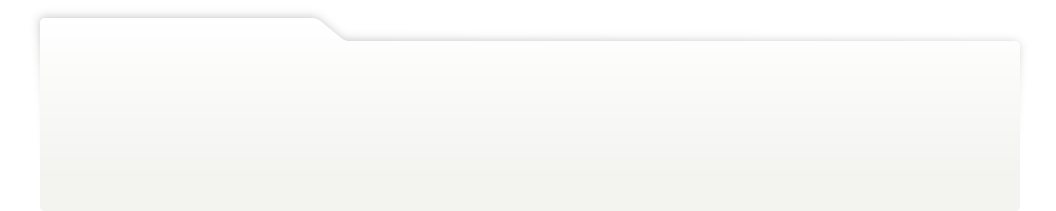
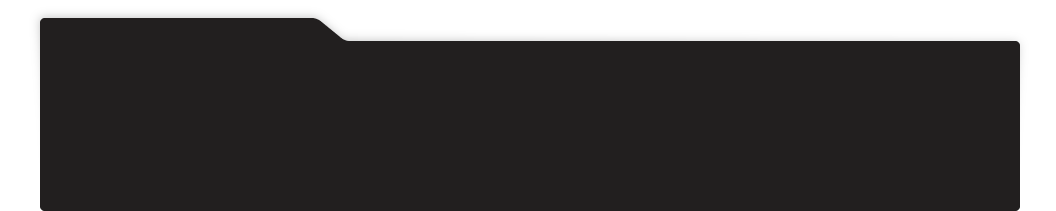
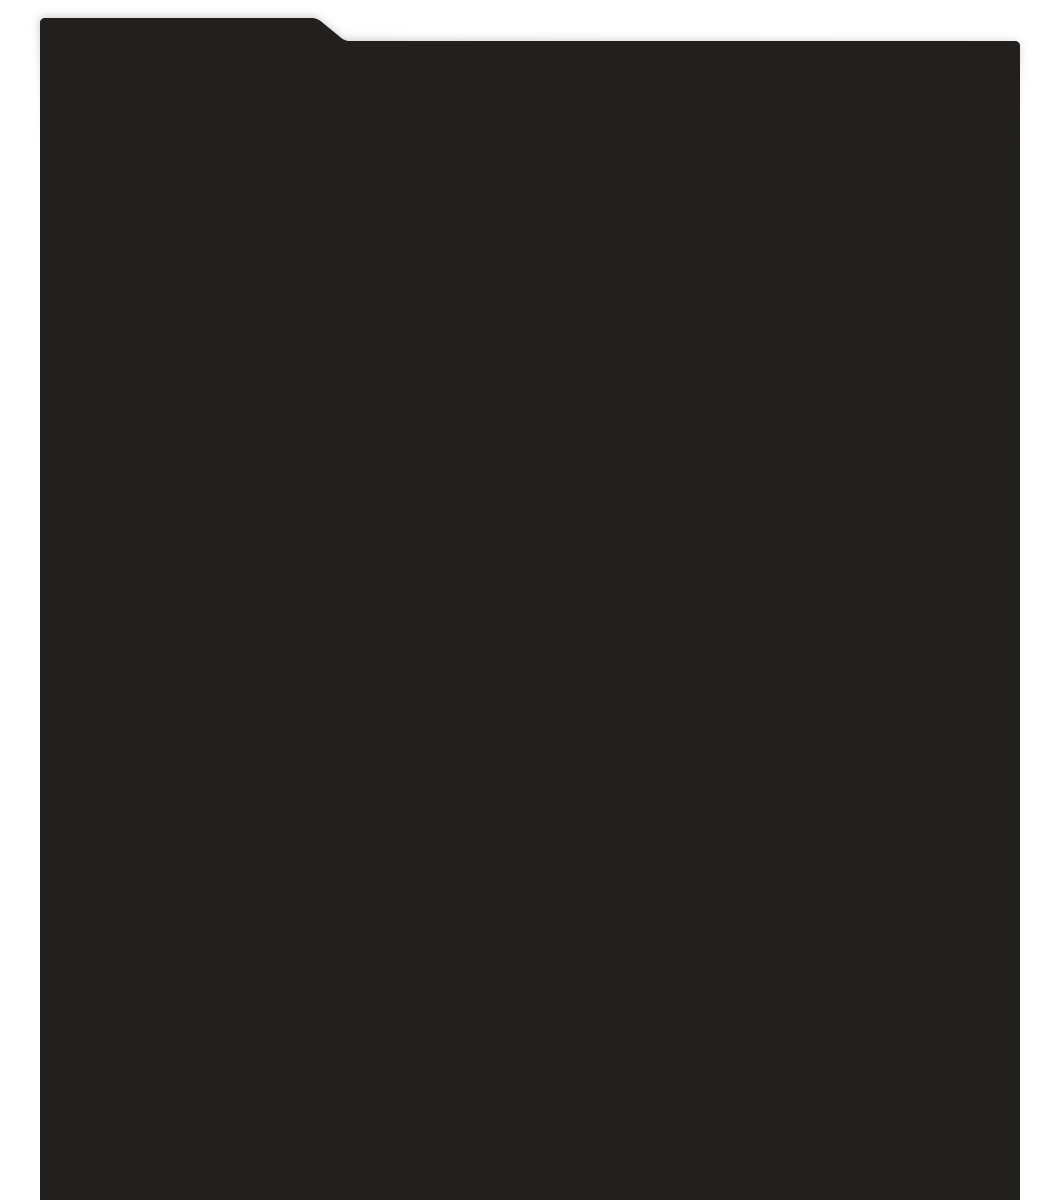
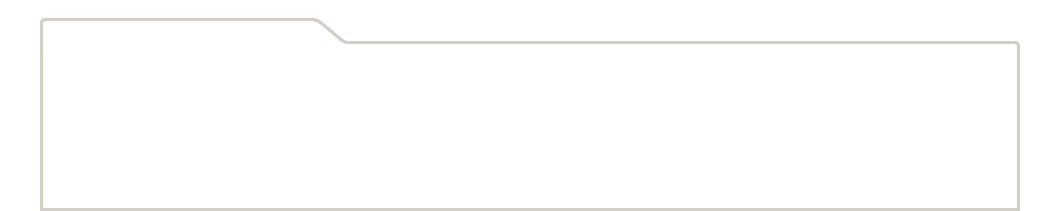
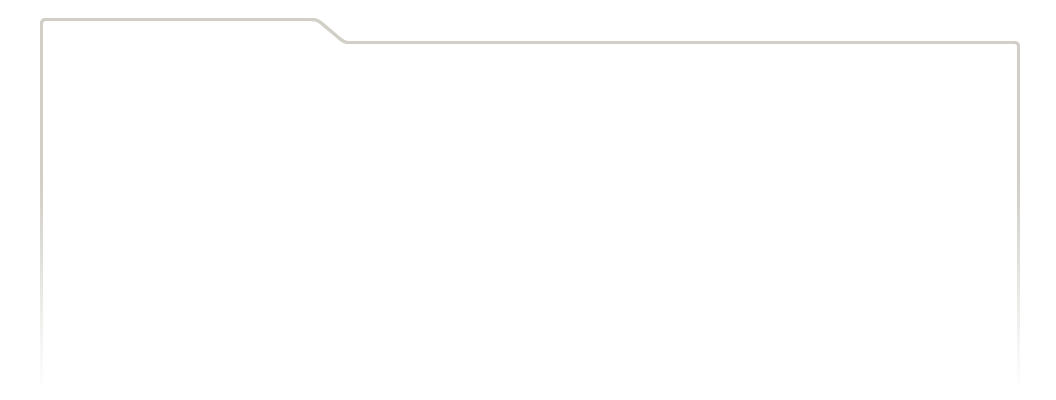
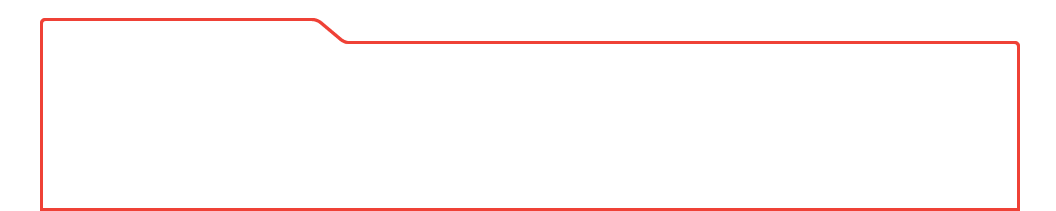
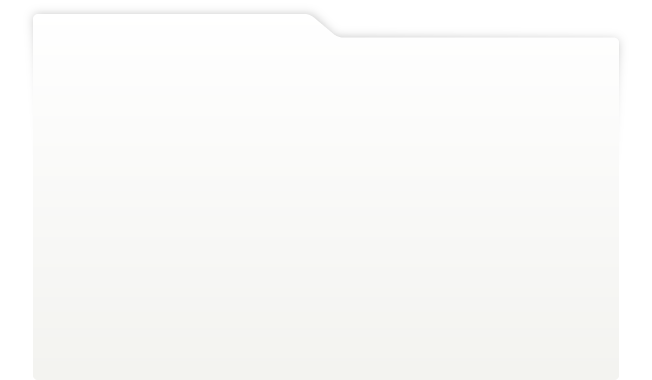
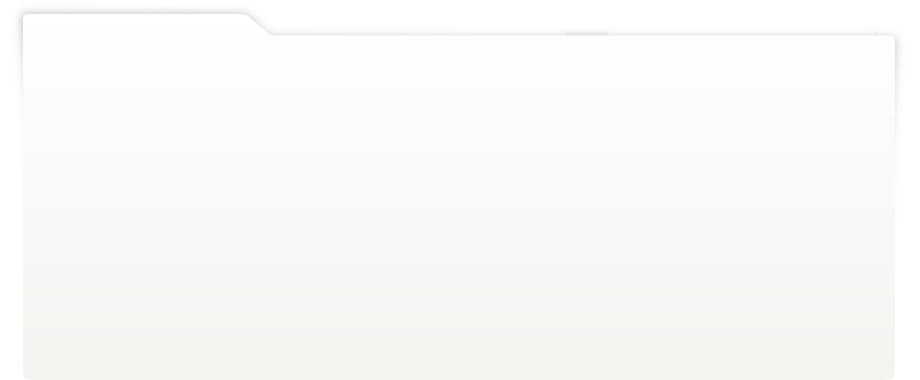
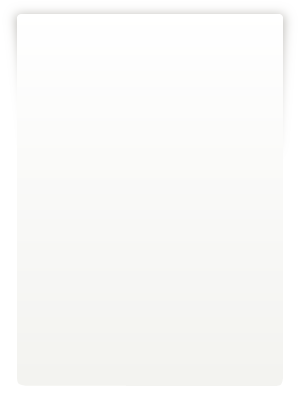
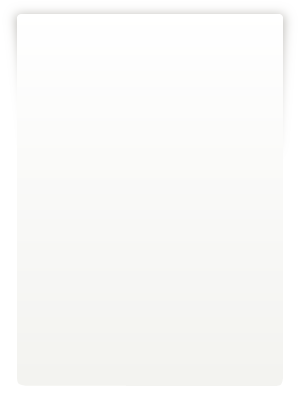
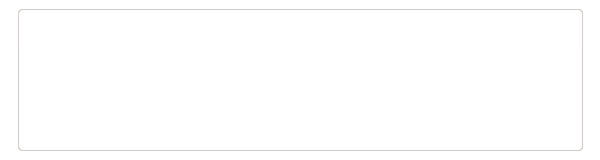
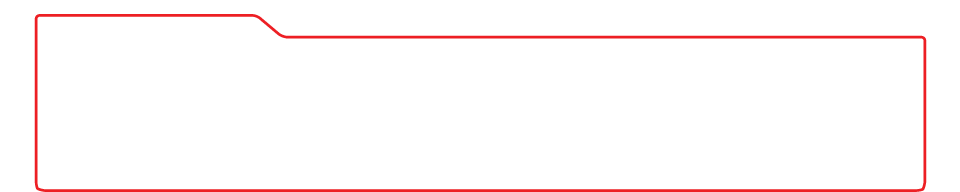
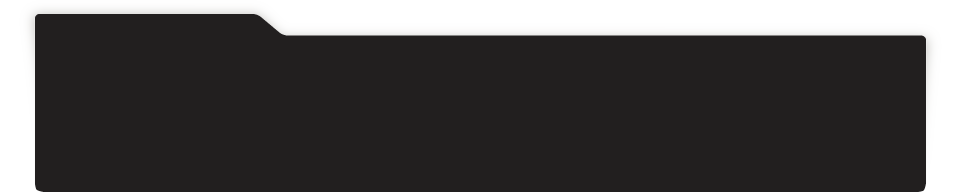
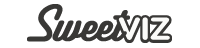
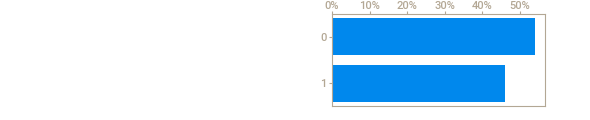
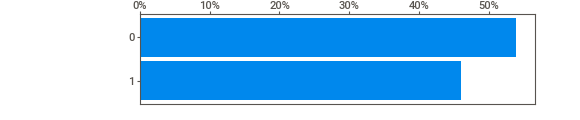
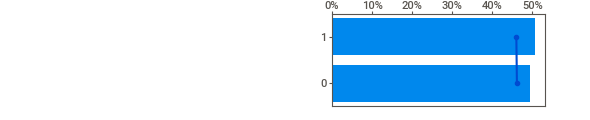
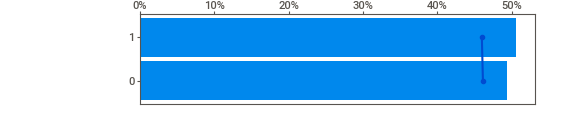
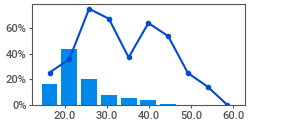
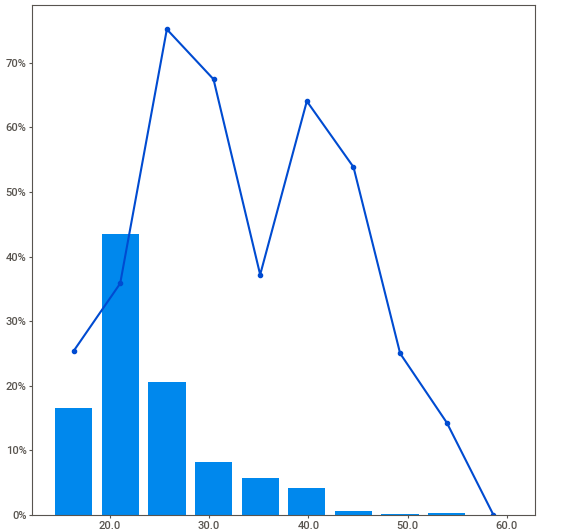
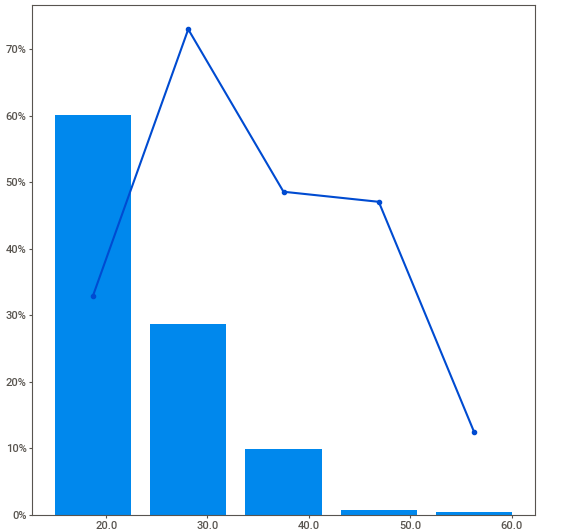
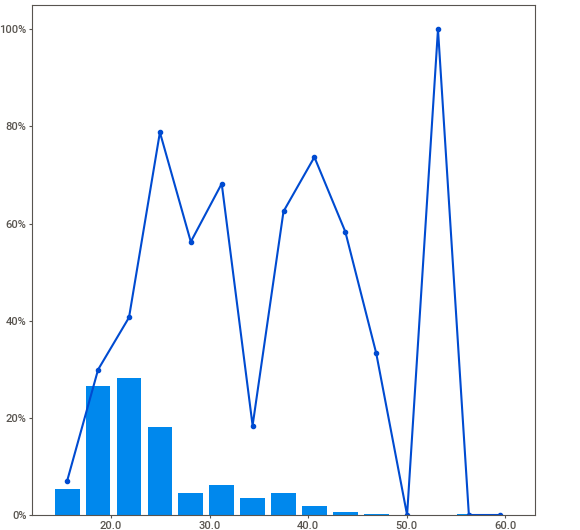
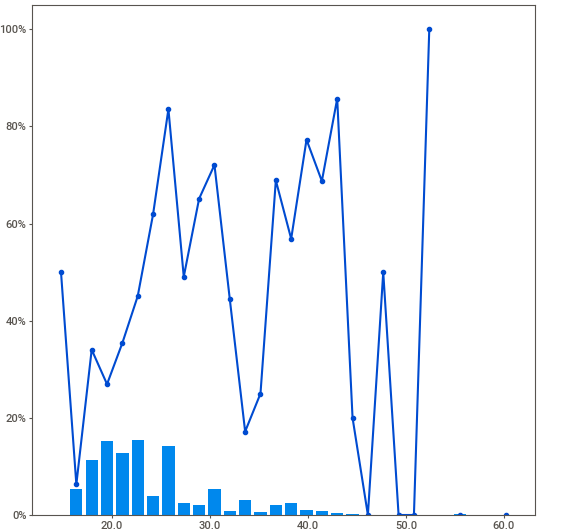
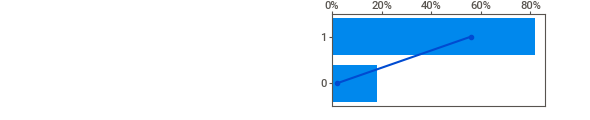
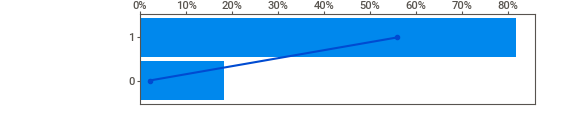
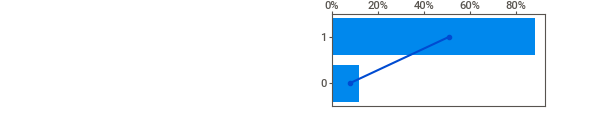
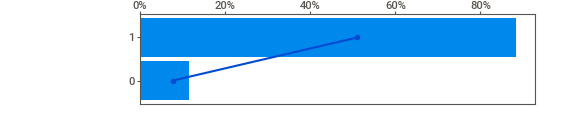
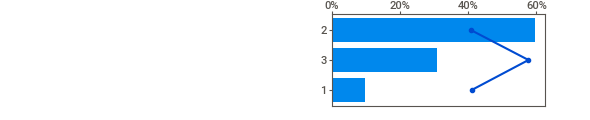
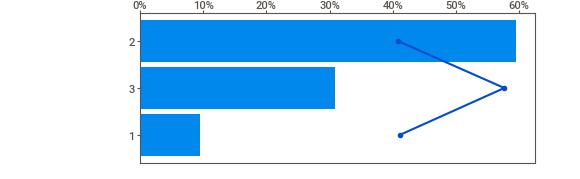
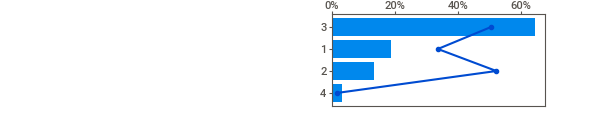
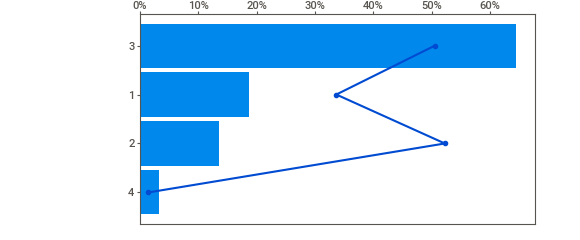
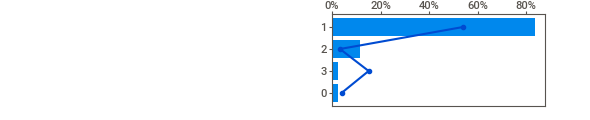
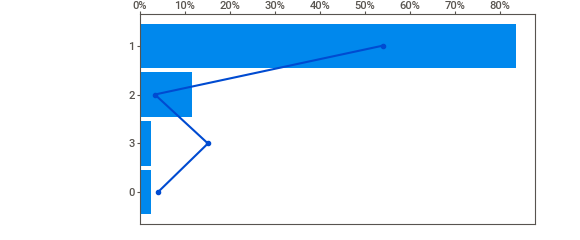
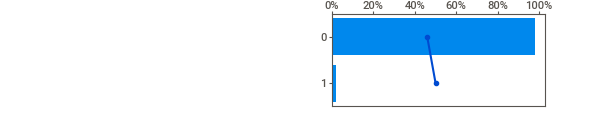
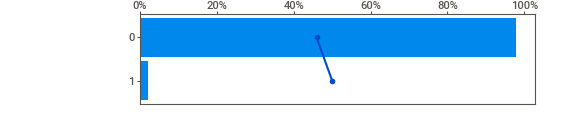
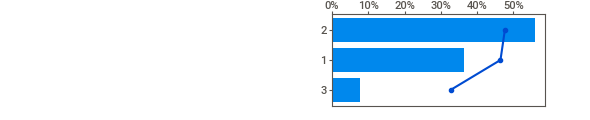
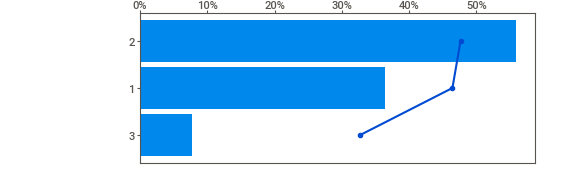
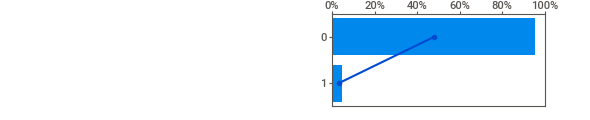
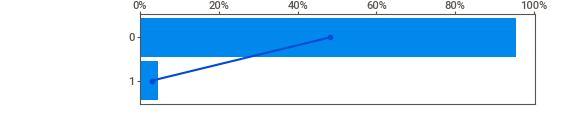
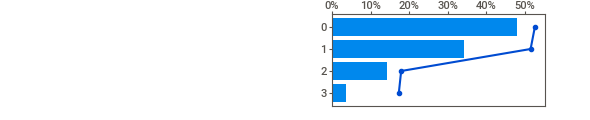
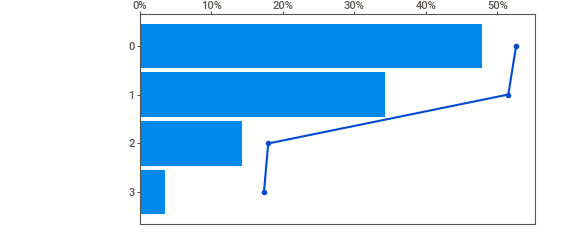
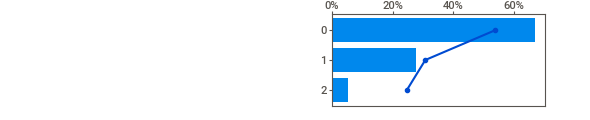
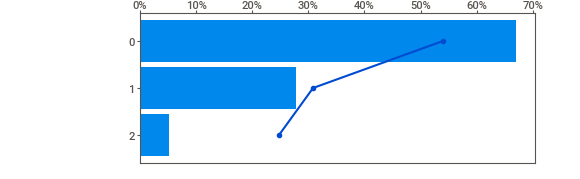
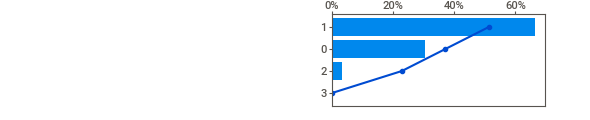
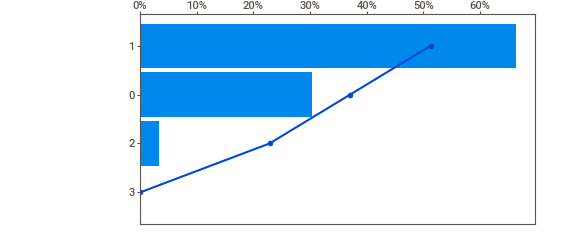
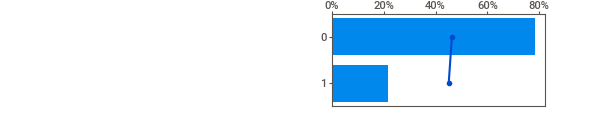
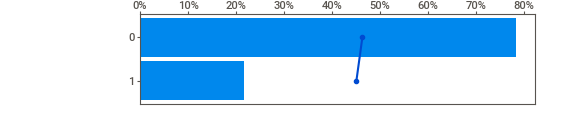
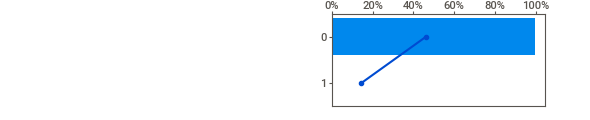
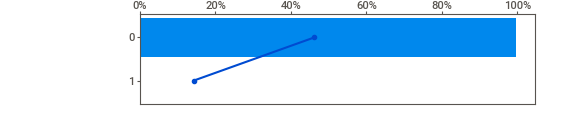
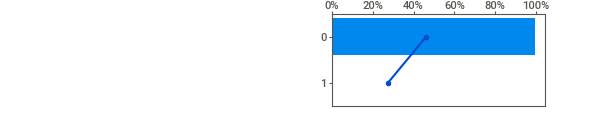
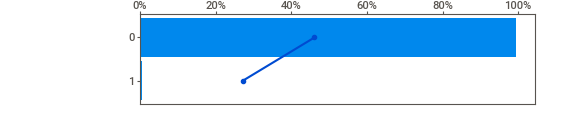
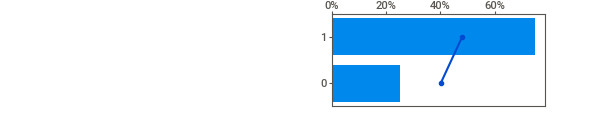
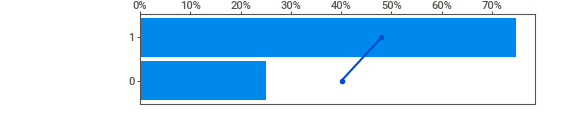
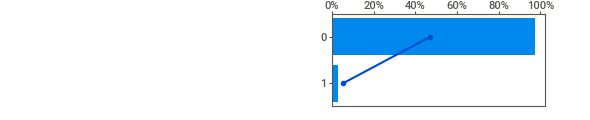
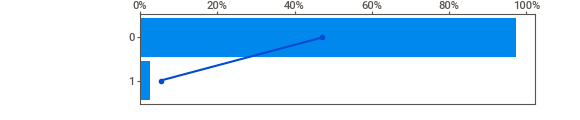
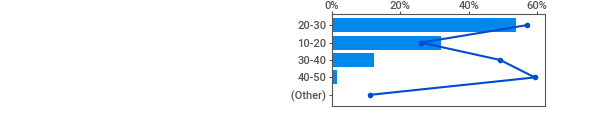
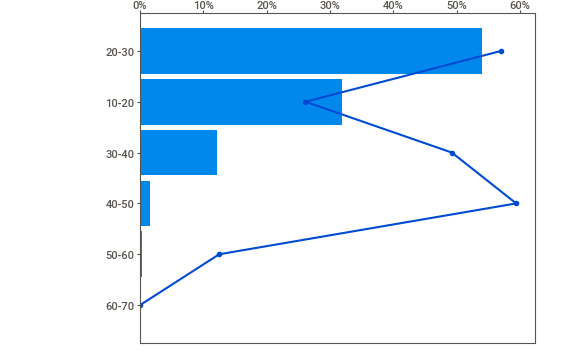
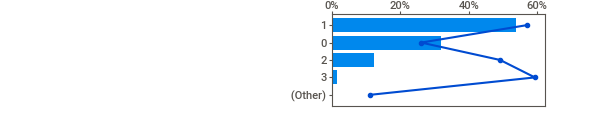
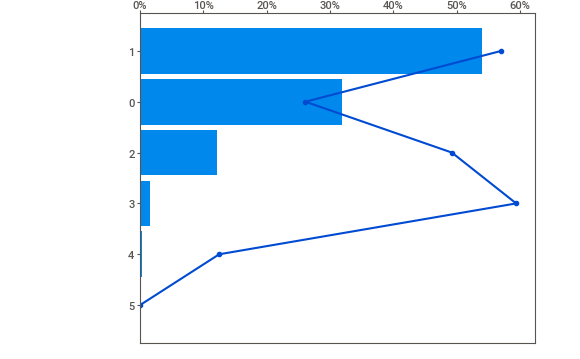
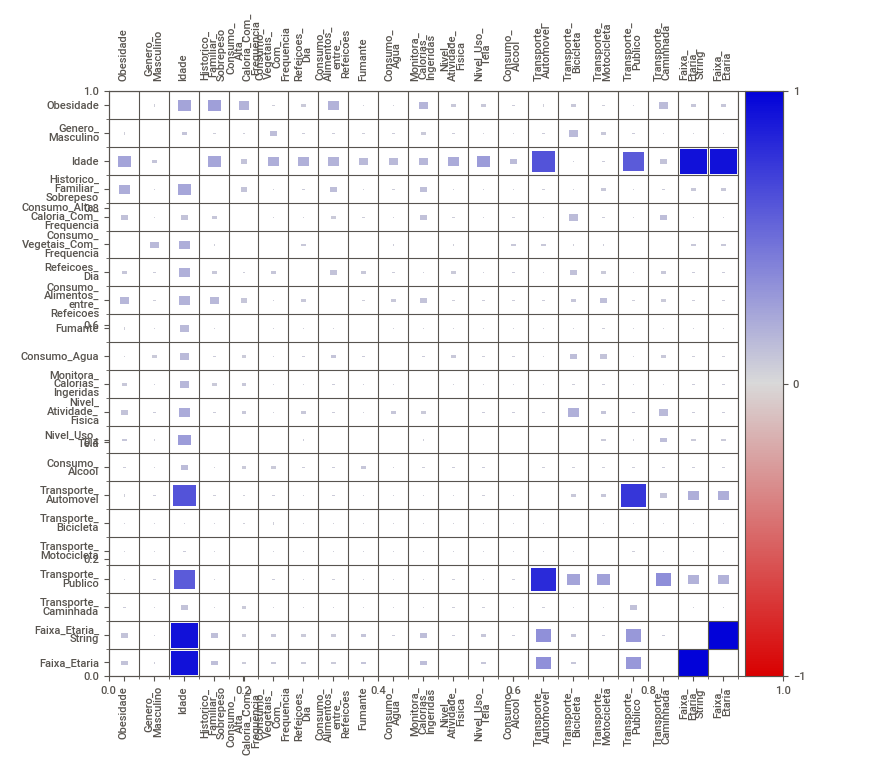
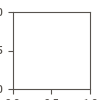

In [20]:
sv_obesidade_report.show_notebook()

### Treinamento do Modelo - Baseline

In [25]:
# Dividir Dados de Treino e Teste

X = df_obesity.drop(columns=['Obesidade','Idade','Faixa_Etaria_String'], axis=1)
y = df_obesity['Obesidade']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=51, shuffle=True)

In [26]:
# Treinamento do Modelo

model_baseline = GaussianNB()
model_baseline.fit(X_train, y_train)

GaussianNB()

### Métricas Modelo Baseline

In [27]:
# Predizer valores do conjunto de testes
y_pred = model_baseline.predict(X_test)

In [31]:
# Avalisando o desempenho do modelo
classification_report_str = classification_report(y_test, y_pred)
recall_baseline = recall_score(y_test, y_pred, average='macro')
print(f'Relatório de Classificação:\n{classification_report_str}')
print(f'Recall:\n{recall_baseline}')

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.94      0.60      0.73       339
           1       0.67      0.96      0.79       295

    accuracy                           0.76       634
   macro avg       0.81      0.78      0.76       634
weighted avg       0.82      0.76      0.76       634

Recall:
0.775901204939753


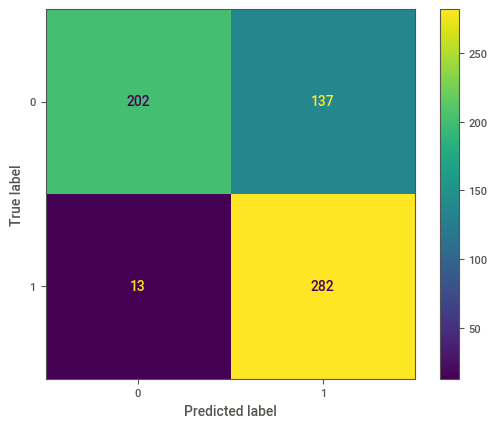

In [35]:
# Mostrar Matriz de Confusão
confusion_matrix_model_baseline = confusion_matrix(y_test, y_pred)
disp_model_baseline = ConfusionMatrixDisplay(confusion_matrix_model_baseline)
disp_model_baseline.plot()

### Treinamento Modelo - Automated Feature Selection

In [78]:
# Select KBest - Seleciona as K melhores features, baseado em um teste

kbest = SelectKBest(score_func=chi2, k=8)

In [79]:
X_train_kbest = kbest.fit_transform(X_train, y_train)

In [80]:
X_train_kbest

array([[0, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 0, 2],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 2],
       [1, 1, 3, ..., 1, 0, 1],
       [1, 1, 1, ..., 0, 0, 1]], dtype=int64)

In [83]:
# Features Selecionadas
kbest_features = kbest.get_support(indices=True)
X_train_best_features = X_train.iloc[:,kbest_features]
X_train_best_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1477 entries, 301 to 2105
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Historico_Familiar_Sobrepeso         1477 non-null   int64   
 1   Consumo_Alta_Caloria_Com_Frequencia  1477 non-null   int64   
 2   Consumo_Alimentos_entre_Refeicoes    1477 non-null   int64   
 3   Monitora_Calorias_Ingeridas          1477 non-null   int64   
 4   Nivel_Atividade_Fisica               1477 non-null   int32   
 5   Nivel_Uso_Tela                       1477 non-null   int32   
 6   Transporte_Caminhada                 1477 non-null   int64   
 7   Faixa_Etaria                         1477 non-null   category
dtypes: category(1), int32(2), int64(5)
memory usage: 82.4 KB


In [47]:
kbest_features

array([ 1,  8,  9, 10, 17], dtype=int64)

In [88]:
# Treinar Modelo com melhores features
model_kbest= GaussianNB()
model_kbest.fit(X_train_best_features, y_train)

GaussianNB()

### Métricas Modelo Select KBest

In [89]:
# Filtras as features nos dados de teste
X_test_kbest = kbest.transform(X_test)
X_test_best_features = X_test.iloc[:,kbest_features]

In [90]:
# Predizer valores do conjunto de testes
y_pred_kbest = model_kbest.predict(X_test_best_features)

In [91]:
# Avalisando o desempenho do modelo
classification_report_str = classification_report(y_test, y_pred_kbest)
recall_baseline = recall_score(y_test, y_pred_kbest, average='macro')
print(f'Relatório de Classificação (KBest):\n{classification_report_str}')
print(f'Recall (KBest):\n{recall_baseline}')

Relatório de Classificação (KBest):
              precision    recall  f1-score   support

           0       0.94      0.61      0.74       339
           1       0.68      0.95      0.79       295

    accuracy                           0.77       634
   macro avg       0.81      0.78      0.76       634
weighted avg       0.82      0.77      0.76       634

Recall (KBest):
0.780105994700265


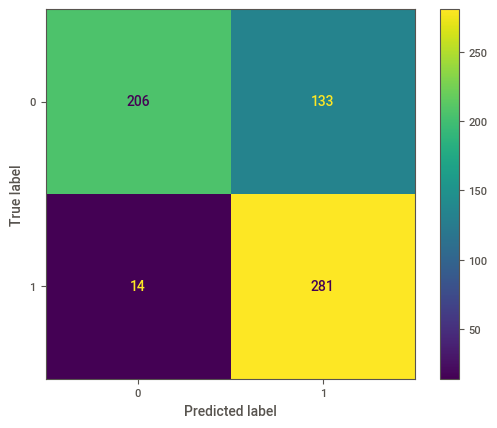

In [92]:
# Mostrar Matriz de Confusão
confusion_matrix_model_baseline = confusion_matrix(y_test, y_pred_kbest)
disp_model_baseline = ConfusionMatrixDisplay(confusion_matrix_model_baseline)
disp_model_baseline.plot()

### Tuning de Hiperparâmetros

In [64]:
# Ajustar hiperparâmetros do SelectKBest

# k = k melhores features conforme chi2

def naivebayes_optuna(trial):
  k = trial.suggest_int('k',1,18)

  kbest = SelectKBest(score_func=chi2, k=k)
  
  X_train_kbest = kbest.fit_transform(X_train, y_train)

  kbest_features = kbest.get_support(indices=True)
  X_train_best_features = X_train.iloc[:,kbest_features]

  # Treinar modelo com melhores features
  model_kbest_optuna = GaussianNB()
  model_kbest_optuna.fit(X_train_best_features, y_train)
  
  # Aplicar o seletor de features no conjunto de testes
  X_best_kbest = kbest.transform(X_test)
  X_test_best_features = X_test.iloc[:,kbest_features]

  # Predizer valores
  y_pred_kbest = model_kbest_optuna.predict(X_test_best_features)

  # Avaliar Recall
  recall_optuna = recall_score(y_test, y_pred_kbest, average='macro')

  return k, recall_optuna

In [75]:
# Rodar o estudo dos hiperparametros

search_space = {"k": range(1,19)}
estudy_naivebayes = optuna.create_study(sampler=optuna.samplers.GridSampler(search_space=search_space), directions=['minimize', 'maximize'])

estudy_naivebayes.optimize(naivebayes_optuna, n_trials=50)

[I 2025-03-11 17:44:17,674] A new study created in memory with name: no-name-eaf256ae-33bd-4bed-b556-fb99f24e44b9
[I 2025-03-11 17:44:17,702] Trial 0 finished with values: [2.0, 0.6659517024148793] and parameters: {'k': 2}.
[I 2025-03-11 17:44:17,721] Trial 1 finished with values: [7.0, 0.748537573121344] and parameters: {'k': 7}.
[I 2025-03-11 17:44:17,756] Trial 2 finished with values: [9.0, 0.775681215939203] and parameters: {'k': 9}.
[I 2025-03-11 17:44:17,789] Trial 3 finished with values: [11.0, 0.7727313634318285] and parameters: {'k': 11}.
[I 2025-03-11 17:44:17,821] Trial 4 finished with values: [15.0, 0.7742062896855157] and parameters: {'k': 15}.
[I 2025-03-11 17:44:17,843] Trial 5 finished with values: [5.0, 0.6950002499875007] and parameters: {'k': 5}.
[I 2025-03-11 17:44:17,874] Trial 6 finished with values: [3.0, 0.6138143092845358] and parameters: {'k': 3}.
[I 2025-03-11 17:44:17,899] Trial 7 finished with values: [17.0, 0.775901204939753] and parameters: {'k': 17}.
[I 

In [76]:
# Mostrar melhor resultado

trial_with_best_recall = max(estudy_naivebayes.best_trials, key=lambda t: t.values[1])

print('Trial com maior recall e menor k: ')

print(f"\ttrial number: {trial_with_best_recall.number}")
print(f"\tparam: {trial_with_best_recall.params}")
print(f"\tvalues(k,recall): {trial_with_best_recall.values}")


Trial com maior recall e menor k: 
	trial number: 10
	param: {'k': 8}
	values(k,recall): [8.0, 0.780105994700265]


In [77]:
# Mostrar Chart com Trails
fig = optuna.visualization.plot_pareto_front(estudy_naivebayes)
fig.show()

### Salvar Modelo

In [94]:
import joblib

# Salvar o modelo

joblib.dump(model_kbest, 'obesity_model.pkl')

['obesity_model.pkl']